In [4]:
import config
import numpy as np
import Test_without_Training

def get_data(K1, K2, subj1, subj2):
    trainer1 = Test_without_Training.TremorModelTrainer(config, subject=subj1)
    X1_train, y1_train, X1_test, y1_test = trainer1.return_K_data(K=K1)

    trainer2 = Test_without_Training.TremorModelTrainer(config, subject=subj2)
    X2_train, y2_train, X2_test, y2_test = trainer2.return_K_data(K=K2)

    # Combine and shuffle training data from both subjects
    X_train = np.concatenate([X1_train, X2_train], axis=0)
    y_train = np.concatenate([y1_train, y2_train], axis=0)
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return {
        "trainer": trainer2,  # just pick one to call train_multiple_dataset
        "X1_train": X1_train, "y1_train": y1_train,
        "X2_train": X2_train, "y2_train": y2_train,
        "X_train": X_train,   "y_train": y_train,
        "X1_test": X1_test,   "y1_test": y1_test,
        "X2_test": X2_test,   "y2_test": y2_test
    }

def get_results(K1, K2, subj1, subj2):
    data = get_data(K1, K2, subj1, subj2)
    trainer = data["trainer"]

    # Train with mixed, only subj2, and only subj1
    acc1, model_mix = trainer.train_multiple_dataset(data["X_train"], data["y_train"], data["X1_test"], data["y1_test"])
    acc2, model_s2  = trainer.train_multiple_dataset(data["X2_train"], data["y2_train"], data["X1_test"], data["y1_test"])
    acc3, model_s1  = trainer.train_multiple_dataset(data["X1_train"], data["y1_train"], data["X1_test"], data["y1_test"])

    # Evaluate all models on subj2
    _, acc_mix_s2 = model_mix.evaluate(data["X2_test"], data["y2_test"], verbose=0)
    _, acc_s2_s2  = model_s2.evaluate(data["X2_test"], data["y2_test"], verbose=0)
    _, acc_s1_s2  = model_s1.evaluate(data["X2_test"], data["y2_test"], verbose=0)

    return [acc1, acc2, acc3], [acc_mix_s2, acc_s2_s2, acc_s1_s2], data

def print_results(acc_H, acc_X):
    print(f"Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     {acc_H[0]:.2f}%")
    print(f"Trained with Subject 1        / Tested on 1 (Inter-session):     {acc_H[2]:.2f}%")
    print(f"Trained with Subject 2        / Tested on 1 (Inter-subject):     {acc_H[1]:.2f}%\n")

    print(f"Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     {acc_X[0]*100:.2f}%")
    print(f"Trained with Subject 2        / Tested on 2 (Inter-session):     {acc_X[1]*100:.2f}%")
    print(f"Trained with Subject 1        / Tested on 2 (Inter-subject):     {acc_X[2]*100:.2f}%")

In [5]:
acc_H_base, acc_X_base, data_base = get_results(K1=1, K2=1, subj1="Hunmin", subj2="Xianyu")
acc_H, acc_X, data = get_results(K1=28, K2=6, subj1="Hunmin", subj2="Xianyu")

Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/34 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/34 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/34 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/34 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/34 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/34 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/34 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/34 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/34 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/34 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/34 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Dataset 17/34 - Session Exp_2025-06-24-v3/E9AD0E7DCC2B/
Dataset 18/34 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/
Dataset

In [6]:
print_results(acc_H_base, acc_X_base)
print("\n")
print_results(acc_H, acc_X)

Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     74.15%
Trained with Subject 1        / Tested on 1 (Inter-session):     81.44%
Trained with Subject 2        / Tested on 1 (Inter-subject):     68.79%

Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     70.98%
Trained with Subject 2        / Tested on 2 (Inter-session):     71.70%
Trained with Subject 1        / Tested on 2 (Inter-subject):     60.79%


Trained with Subjects 1 and 2 / Tested on 1 (Inter-session):     91.18%
Trained with Subject 1        / Tested on 1 (Inter-session):     91.74%
Trained with Subject 2        / Tested on 1 (Inter-subject):     76.95%

Trained with Subjects 1 and 2 / Tested on 2 (Inter-session):     66.93%
Trained with Subject 2        / Tested on 2 (Inter-session):     71.46%
Trained with Subject 1        / Tested on 2 (Inter-subject):     51.28%


In [ ]:
Trained with Subjects H and X / Tested on H (Inter-session):     76.00%
Trained with Subject H        / Tested on H (Inter-session):     78.24%
Trained with Subject X        / Tested on H (Inter-subject):     68.12%

Trained with Subjects H and X / Tested on X (Inter-session):     71.18%
Trained with Subject X        / Tested on X (Inter-session):     69.94%
Trained with Subject H        / Tested on X (Inter-subject):     58.46%


Trained with Subjects H and X / Tested on H (Inter-session):     90.20%
Trained with Subject H        / Tested on H (Inter-session):     91.02%
Trained with Subject X        / Tested on H (Inter-subject):     77.17%

Trained with Subjects H and X / Tested on X (Inter-session):     67.11%
Trained with Subject X        / Tested on X (Inter-session):     70.16%
Trained with Subject H        / Tested on X (Inter-subject):     51.17%


Class distribution for Train - Hunmin:
  Class 0: 147002 samples (62.13%)
  Class 1: 19507 samples (8.24%)
  Class 2: 17574 samples (7.43%)
  Class 3: 18137 samples (7.67%)
  Class 4: 16948 samples (7.16%)
  Class 5: 17438 samples (7.37%)


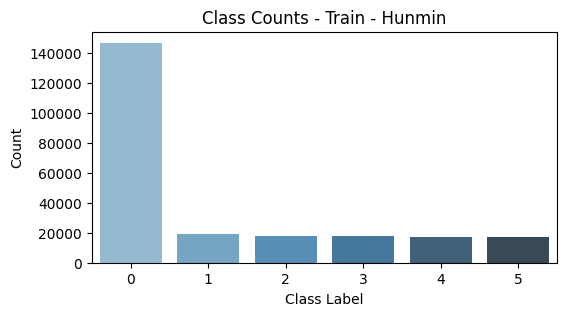


Class distribution for Train - Xianyu:
  Class 0: 35079 samples (69.57%)
  Class 1: 1991 samples (3.95%)
  Class 2: 3171 samples (6.29%)
  Class 3: 3279 samples (6.50%)
  Class 4: 3660 samples (7.26%)
  Class 5: 3239 samples (6.42%)


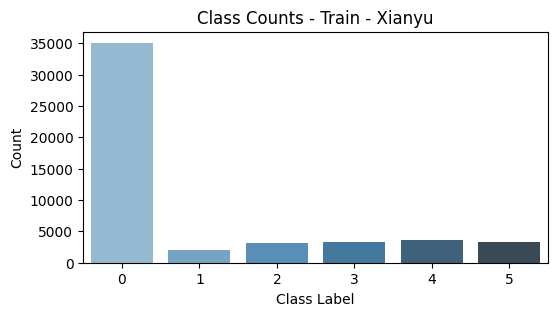


Class distribution for Test - Hunmin:
  Class 0: 38242 samples (74.38%)
  Class 1: 2822 samples (5.49%)
  Class 2: 2576 samples (5.01%)
  Class 3: 2377 samples (4.62%)
  Class 4: 2809 samples (5.46%)
  Class 5: 2590 samples (5.04%)


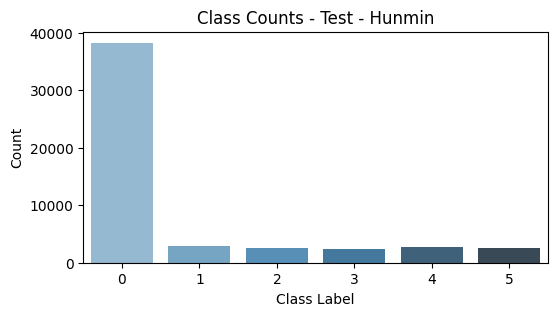


Class distribution for Test - Xianyu:
  Class 0: 23857 samples (69.43%)
  Class 1: 2464 samples (7.17%)
  Class 2: 3139 samples (9.14%)
  Class 3: 1215 samples (3.54%)
  Class 4: 1754 samples (5.10%)
  Class 5: 1933 samples (5.63%)


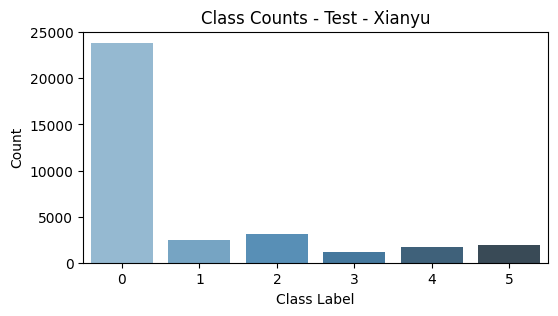

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_class_distribution(y, title):
    counter = Counter(y)
    total = sum(counter.values())
    classes = sorted(counter.keys())
    counts = [counter[c] for c in classes]
    portions = [c / total for c in counts]

    print(f"\nClass distribution for {title}:")
    for cls, count, portion in zip(classes, counts, portions):
        print(f"  Class {cls}: {count} samples ({portion:.2%})")

    # Optional: Bar plot
    plt.figure(figsize=(6, 3))
    sns.barplot(x=classes, y=counts, palette="Blues_d")
    plt.title(f"Class Counts - {title}")
    plt.xlabel("Class Label")
    plt.ylabel("Count")
    plt.show()

subj1, subj2 = "Hunmin", "Xianyu"
analyze_class_distribution(data["y1_train"], f"Train - {subj1}")
analyze_class_distribution(data["y2_train"], f"Train - {subj2}")
analyze_class_distribution(data["y1_test"], f"Test - {subj1}")
analyze_class_distribution(data["y2_test"], f"Test - {subj2}")

In [ ]:
# Which gesture has better accuracy?

# Improve the model itself not the learning method